In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os, sys
#os.listdir(os.getcwd())
#os.chdir('gdrive')
os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')
os.listdir(os.getcwd())
#os.getcwd()

['dmref',
 '1d-example_2fidelities.ipynb',
 'high_fidelity_simulations',
 'low_fidelity_simulations',
 '2d-example_3fidelities.ipynb',
 'project.ipynb',
 'surface_plot.png',
 'mean_high_response.png',
 'mean_low_response.png',
 'variance_high_fidelity.png',
 'observations.png',
 'prediction_and_observations.png',
 'prediction_vs_observations.png',
 'std_error.png',
 'correlations.png',
 'Copy of Perdikaris.ipynb',
 'Perdikaris.ipynb']

In [ ]:
pip install GPy

     |████████████████████████████████| 1.0MB 3.3MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp27-cp27mu-linux_x86_64.whl size=2546397 sha256=9742ff68dd9fad021320311dfdd1cdf148bb7041073c3568121f384fc7a660ee
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp27-none-any.whl size=102552 sha256=09f26dd53c099ba153434a03a547cc683bff370519f3bd196894540a0023fe52
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy paramz


In [ ]:
# importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import os, sys
sys.path.insert(0, os.path.join(os.getcwd(), '..'))
from dmref import MFGP
import matplotlib.mlab as ml
import warnings
warnings.filterwarnings("ignore")

# importing needed libraries
np.random.seed(11)

In [ ]:
import re
os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')
os.chdir('high_fidelity_simulations')

filenames= os.listdir (".") # get all files' and folders' names in the current directory
folder_names = []
for filename in filenames: # loop through all the files and folders
    if os.path.isdir(os.path.join(os.path.abspath("."), filename)): # check whether the current object is a folder or not
        folder_names.append(filename)
        
#foldernames.sort()
print folder_names
Xh = np.empty((0, 2))
Yh = np.empty((0, 1))
for i in range(0, len(folder_names)):
#for i in range(0, 2):
  os.chdir(folder_names[i])

  name = [float(s) for s in re.findall(r'-?\d+\.?\d*',folder_names[i])]
  omega = name[0]
  Ca = name[1]
  #if omega>1 or Ca>2:
  if Ca==0.25:
    pass
  else:
    #Xh = np.append(Xh, np.array([[omega, Ca]]), axis=0)
    Xh = np.append(Xh, np.array([[omega, Ca]]), axis=0)

    mean = np.loadtxt('mean.dat')
  #if omega>1 or Ca>2:
    #pass
  #elif omega!=0:
    if omega!=0:
      first_value = int(mean[-1,0]-2*np.pi/omega)            
      finding_vector = mean[:,0].astype(int)
      first_index = np.where((finding_vector)==first_value)
      focusing_distance = np.mean(mean[first_index[-1][-1]:-1,1])
      Yh = np.append(Yh, np.array([[focusing_distance]]), axis=0)
    else:
      focusing_distance = mean[-1, 1]
      Yh = np.append(Yh, np.array([[focusing_distance]]), axis=0)
  
  os.chdir('..')

print 'Xh=', Xh
print 'Yh=', Yh
print Xh.shape
print Yh.shape

['w=0.1_Ca=10_Re=10', 'w=0.5_Ca=10_Re=10', 'w=0_Ca=1.67_Re=10', 'w=0.1_Ca=1.67_Re=10', 'w=0.5_Ca=1.67_Re=10', 'w=1_Ca=1.67_Re=10', 'w=0_Ca=1_Re=10', 'w=0.1_Ca=1_Re=10', 'w=1_Ca=1_Re=10', 'w=0_Ca=0.5_Re=10', 'w=0.01_Ca=0.5_Re=10', 'w=0.1_Ca=0.5_Re=10', 'w=1_Ca=0.5_Re=10', 'w=0_Ca=0.33_Re=10', 'w=0.1_Ca=0.33_Re=10', 'w=0_Ca=0.25_Re=10', 'w=0.1_Ca=0.25_Re=10', 'w=0_Ca=0.09_Re=10', 'w=0.01_Ca=0.09_Re=10', 'w=0.1_Ca=0.09_Re=10', 'w=1_Ca=0.09_Re=10', 'w=0.5_Ca=0.33_Re=10', 'w=0.5_Ca=0.09_Re=10', 'w=0.5_Ca=0.5_Re=10']
Xh= [[ 0.1  10.  ]
 [ 0.5  10.  ]
 [ 0.    1.67]
 [ 0.1   1.67]
 [ 0.5   1.67]
 [ 1.    1.67]
 [ 0.    1.  ]
 [ 0.1   1.  ]
 [ 1.    1.  ]
 [ 0.    0.5 ]
 [ 0.01  0.5 ]
 [ 0.1   0.5 ]
 [ 1.    0.5 ]
 [ 0.    0.33]
 [ 0.1   0.33]
 [ 0.    0.09]
 [ 0.01  0.09]
 [ 0.1   0.09]
 [ 1.    0.09]
 [ 0.5   0.33]
 [ 0.5   0.09]
 [ 0.5   0.5 ]]
Yh= [[0.13821646]
 [0.18312037]
 [0.26307677]
 [0.26963755]
 [0.27324502]
 [0.26320391]
 [0.31362263]
 [0.31726111]
 [0.30680698]
 [0.37896151]
 [0.

In [ ]:
import re
os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')
os.chdir('low_fidelity_simulations')

filenames= os.listdir (".") # get all files' and folders' names in the current directory
folder_names = []
for filename in filenames: # loop through all the files and folders
    if os.path.isdir(os.path.join(os.path.abspath("."), filename)): # check whether the current object is a folder or not
        folder_names.append(filename)
        
#foldernames.sort()
print folder_names
Xl = np.empty((0, 2))
Yl = np.empty((0, 1))
for i in range(0, len(folder_names)):
#for i in range(0, 2):
  os.chdir(folder_names[i])

  name = [float(s) for s in re.findall(r'-?\d+\.?\d*',folder_names[i])]
  omega = name[0]
  Ca = name[1]
  #if omega>1 or Ca>2:
  if Ca==0.25:
    pass
  else:
    #Xl = np.append(Xl, np.array([[omega, Ca]]), axis=0)
    Xl = np.append(Xl, np.array([[omega, Ca]]), axis=0)

    mean = np.loadtxt('mean.dat')
  #if omega>1 or Ca>2:
      #pass
  #elif omega!=0:
    if omega!=0:
      first_value = int(mean[-1,0]-2*np.pi/omega)            
      finding_vector = mean[:,0].astype(int)
      first_index = np.where((finding_vector)==first_value)
      focusing_distance = np.mean(mean[first_index[-1][-1]:-1,1])
      Yl = np.append(Yl, np.array([[focusing_distance]]), axis=0)
    else:
      focusing_distance = mean[-1, 1]
      Yl = np.append(Yl, np.array([[focusing_distance]]), axis=0)
  
  os.chdir('..')

print 'Xl=', Xl
print 'Yl=', Yl
print Yl.shape
print Xl.shape

['w=0.1_Ca=10_Re=10', 'w=0.5_Ca=10_Re=10', 'w=0_Ca=1_Re=10', 'w=0.01_Ca=1_Re=10', 'w=0.1_Ca=1_Re=10', 'w=0.5_Ca=1_Re=10', 'w=1_Ca=1_Re=10', 'w=2_Ca=1_Re=10', 'w=8_Ca=1_Re=10', 'w=0.1_Ca=1.67_Re=10', 'w=0_Ca=0.5_Re=10', 'w=0.01_Ca=0.5_Re=10', 'w=0.1_Ca=0.5_Re=10', 'w=0.5_Ca=0.5_Re=10', 'w=0.1_Ca=0.33_Re=10', 'w=0.1_Ca=0.25_Re=10', 'w=0.1_Ca=0.09_Re=10', 'w=0.01_Ca=1.67_Re=10', 'w=0_Ca=1.67_Re=10', 'w=0.5_Ca=1.67_Re=10', 'w=1_Ca=1.67_Re=10', 'w=0_Ca=0.09_Re=10', 'w=0.01_Ca=0.09_Re=10', 'w=1_Ca=0.5_Re=10', 'w=1_Ca=0.09_Re=10', 'w=0_Ca=0.25_Re=10', 'w=0_Ca=0.33_Re=10', 'w=0.5_Ca=0.09_Re=10', 'w=0.5_Ca=0.25_Re=10', 'w=0.5_Ca=0.33_Re=10', 'w=2_Ca=1.67_Re=10', 'w=8_Ca=1.67_Re=10']
Xl= [[ 0.1  10.  ]
 [ 0.5  10.  ]
 [ 0.    1.  ]
 [ 0.01  1.  ]
 [ 0.1   1.  ]
 [ 0.5   1.  ]
 [ 1.    1.  ]
 [ 2.    1.  ]
 [ 8.    1.  ]
 [ 0.1   1.67]
 [ 0.    0.5 ]
 [ 0.01  0.5 ]
 [ 0.1   0.5 ]
 [ 0.5   0.5 ]
 [ 0.1   0.33]
 [ 0.1   0.09]
 [ 0.01  1.67]
 [ 0.    1.67]
 [ 0.5   1.67]
 [ 1.    1.67]
 [ 0.    0.09

In [ ]:
import GPy
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.mlab as ml
import matplotlib.patches as mpatches

import time

np.random.seed(11)

def rmse(pred, truth):
    pred = pred.flatten()
    truth = truth.flatten()
    return np.sqrt(np.mean((pred-truth)**2))


''' Create training set '''
#N1 = 80
#N2 = 40
#N3 = 20

plot = 1
save = 0

dim = 2
#lb = np.array([-5.0, 0.0])
#ub = np.array([10.0, 15.0])

#tmp = np.random.rand(1000,dim)
#Xtrain = scale_range(tmp,ub,lb)
#idx = np.random.permutation(1000)
#X1 = Xtrain[idx[0:N1], :]
#X2 = Xtrain[idx[0:N2], :]
#X3 = Xtrain[idx[0:N3], :]

#Y1 = low(X1)[:,None]
#Y2 = medium(X2)[:,None]
#Y3 = high(X3)[:,None]

#nn = 40
#lb = np.array([-5.0, 0.0])
#ub = np.array([10.0, 15.0])
#x1 = np.linspace(lb[0], ub[0], 100)
#x2 = np.linspace(lb[1], ub[1], 100)
nx1=100
nx2=100
x1 = np.linspace(0, 1, nx1)
x2 = np.linspace(0.09, 1.67, nx2)
x1, x2 = np.meshgrid(x1, x2)

#tmp = np.random.rand(1000,2)
#Xtest = scale_range(tmp,ub,lb)
Xtest = np.hstack([x1.flatten()[:, None], x2.flatten()[:, None]])
ntest = Xtest.shape[0]

#Exact = high(Xtest)
#Medium = medium(Xtest)
#Low = low(Xtest)

#Exactplot = ml.griddata(Xtest[:,0],Xtest[:,1], Exact, X, Y, interp = 'linear')
#Medplot = ml.griddata(Xtest[:,0],Xtest[:,1], Medium, X, Y, interp = 'linear')
#Lowplot = ml.griddata(Xtest[:,0],Xtest[:,1], Low, X, Y, interp = 'linear')

active_dimensions = np.arange(0,dim)

# if plot == 1:
#     fig = plt.figure(1)
#     ax = fig.add_subplot(111, projection='3d')
#     ax.plot_surface(X, Y, Exactplot, color = '#377eb8', rstride=2, cstride=2,
#                                     linewidth=0, antialiased=True, shade = True, alpha = 0.6)
#     ax.plot_surface(X, Y, Medplot, color = 'magenta', rstride=2, cstride=2,
#                                     linewidth=0, antialiased=True, shade = True, alpha = 0.6)
#     ax.plot_surface(X, Y, Lowplot, color = 'green', rstride=2, cstride=2,
#                                     linewidth=0, antialiased=True, shade = True, alpha = 0.6)

#     fig = plt.figure(2)
#     plt.pcolor(X, Y, Exactplot, cmap='jet')
#     plt.colorbar()

#     fig = plt.figure(3)
#     plt.plot(Low,Exact,'.')

#     fig = plt.figure(4)
#     plt.plot(Medium,Exact,'.')

#     fig = plt.figure(5)
#     plt.plot(Low,Medium,'.')

start = time.time()

''' Train level 1 '''
k1 = GPy.kern.RBF(dim, ARD = True)
m1 = GPy.models.GPRegression(X=Xl, Y=Yl, kernel=k1)

m1[".*Gaussian_noise"] = m1.Y.var()*0.01
m1[".*Gaussian_noise"].fix()

m1.optimize(max_iters = 500)

m1[".*Gaussian_noise"].unfix()
m1[".*Gaussian_noise"].constrain_positive()

m1.optimize_restarts(30, optimizer = "bfgs",  max_iters = 1000)

mu1, v1 = m1.predict(Xh)


''' Train level 2 '''
XX = np.hstack((Xh, mu1))

k2 = GPy.kern.RBF(1, active_dims = [dim])*GPy.kern.RBF(dim, active_dims = active_dimensions, ARD = True) \
    + GPy.kern.RBF(dim, active_dims = active_dimensions, ARD = True)

m2 = GPy.models.GPRegression(X=XX, Y=Yh, kernel=k2)

m2[".*Gaussian_noise"] = m2.Y.var()*0.01
m2[".*Gaussian_noise"].fix()

m2.optimize(max_iters = 500)

m2[".*Gaussian_noise"].unfix()
m2[".*Gaussian_noise"].constrain_positive()

m2.optimize_restarts(30, optimizer = "bfgs",  max_iters = 1000)



''' Predict at test points '''
# sample f_1 at xtest
nsamples = 1000
mu1, C1 = m1.predict(Xtest, full_cov=True)
Z = np.random.multivariate_normal(mu1.flatten(),C1,nsamples)

# push samples through f_2
tmp_m = np.zeros((nsamples,ntest))
tmp_v = np.zeros((nsamples,ntest))
for i in range(0,nsamples):
    mu, v = m2.predict(np.hstack((Xtest, Z[i,:][:,None])))
    tmp_m[i,:] = mu.flatten()
    tmp_v[i,:] = v.flatten()

# get posterior mean and variance
mean = np.mean(tmp_m, axis = 0)[:,None]
var = np.mean(tmp_v, axis = 0)[:,None]+ np.var(tmp_m, axis = 0)[:,None]
var = np.abs(var)

#error = np.linalg.norm(Exact - mean)/np.linalg.norm(Exact)
#print "N1 = %d, N2 = %d, sample = %d, error = %e" % (N1, N2[ii], jj+1, error)

Optimization restart 1/30, f = -60.1070329476
Optimization restart 2/30, f = -60.107032948
Optimization restart 3/30, f = -60.107032948
Optimization restart 4/30, f = -60.107032948
Optimization restart 5/30, f = -60.1070329476
Optimization restart 6/30, f = -60.1070329476
Optimization restart 7/30, f = -60.1070329475
Optimization restart 8/30, f = -60.1070329476
Optimization restart 9/30, f = -60.107032948
Optimization restart 10/30, f = -60.1070329479
Optimization restart 11/30, f = -60.1070329479
Optimization restart 12/30, f = -60.1070329472
Optimization restart 13/30, f = -60.107032948
Optimization restart 14/30, f = -60.107032948
Optimization restart 15/30, f = -60.1070329478
Optimization restart 16/30, f = -60.1070329479
Optimization restart 17/30, f = -60.1070329479
Optimization restart 18/30, f = -60.1070329478
Optimization restart 19/30, f = -60.107032948
Optimization restart 20/30, f = -60.1070329475
Optimization restart 21/30, f = -60.1070329478
Optimization restart 22/30, f

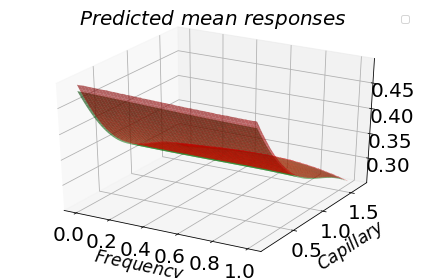

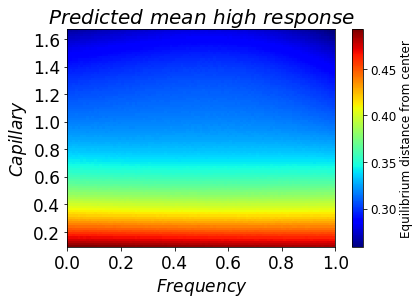

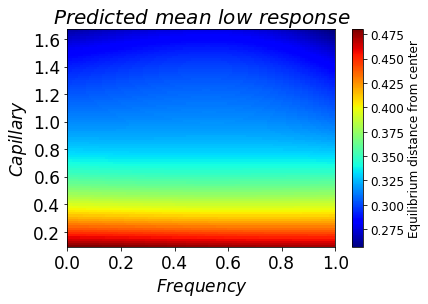

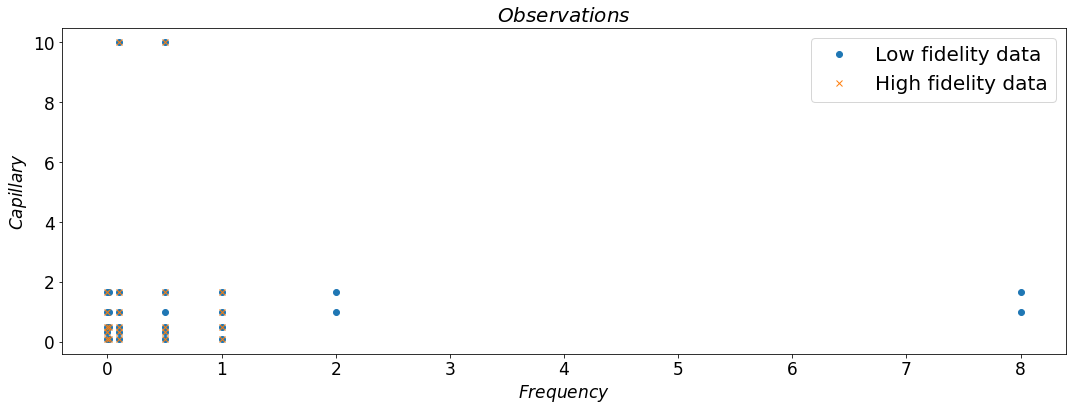

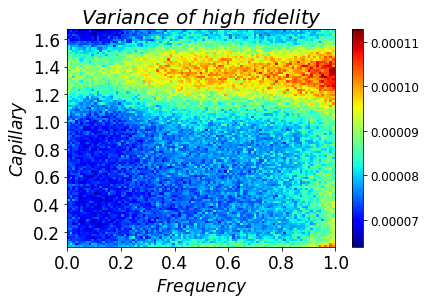

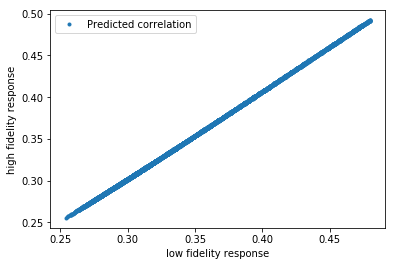

(array([0]), array([0]))
(array([99]), array([0]))


In [ ]:
from matplotlib import pyplot as plt
import matplotlib.mlab as ml
import matplotlib.patches as mpatches

os.chdir('/content/gdrive/My Drive/Uncertainty Quantification/Project')

if plot == 1:
    Highplot = ml.griddata(Xtest[:,0],Xtest[:,1], mean.flatten(), x1, x2, interp = 'linear')
    Lowplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu1.flatten(), x1, x2, interp = 'linear')
    Varplot = ml.griddata(Xtest[:,0],Xtest[:,1], var.flatten(), x1, x2, interp = 'linear')
    #GPplot = ml.griddata(Xtest[:,0],Xtest[:,1], mu4.flatten(), X, Y, interp = 'linear')

    fig = plt.figure(1)
    ax = fig.add_subplot(111, projection='3d')
    #ax.plot_surface(X, Y, Exactplot, color = '#377eb8', rstride=2, cstride=2,
    #                                linewidth=0, antialiased=True, shade = True, alpha = 0.6)
    #ax.plot_surface(X, Y, Medplot, color = 'magenta', rstride=2, cstride=2,
     #                               linewidth=0, antialiased=True, shade = True, alpha = 0.6)
    ax.plot_surface(x1, x2, Lowplot, color = 'green', rstride=2, cstride=2,
                                    linewidth=0, antialiased=True, shade = True, alpha = 0.6)
    ax.plot_surface(x1, x2, Highplot, color = 'red', rstride=2, cstride=2,
                                    linewidth=0, antialiased=True, shade = True, alpha = 0.6)
    
    #fig = plt.figure(figsize=(18,6))
    fig = plt.figure(1)
    plt.title('$Predicted \ mean  \ responses$',fontsize=20)
    plt.xlabel('$Frequency$', fontsize=17, labelpad = 10)
    plt.ylabel('$Capillary$', fontsize=17, labelpad = 10)
    #ax.set_zlabel('Distance', fontsize=30, rotation=0, labelpad=15)
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)
    ax.tick_params(axis="z", labelsize=20)
    plt.tight_layout()
    plt.legend()
    #ali = os.getcwd()
    #print ali
    plt.savefig('surface_plot.png')
    #fig = plt.figure(2)
    #plt.pcolor(X, Y, Exactplot, cmap='jet')
    #plt.colorbar()

    #fig = plt.figure(figsize=(18,6))
    fig = plt.figure(2)
    plt.pcolor(x1, x2, Highplot, cmap='jet')
    #plt.plot(Xh[:,0], Xh[:,1], marker='o', linestyle = '')
    #plt.colorbar()
    cb = plt.colorbar()
    cb.set_label(label='Equilibrium distance from center', size='large')
    cb.ax.tick_params(labelsize='large')
    plt.title('$Predicted \ mean  \ high \ response$',fontsize=20)
    plt.xlabel('$Frequency$', fontsize=17)
    plt.ylabel('$Capillary$', fontsize=17)
    plt.xticks(fontsize= 17)
    plt.yticks(fontsize= 17)
    plt.savefig('mean_high_response.png', bbox_inches = 'tight', pad_inches = 0)

    #fig = plt.figure(figsize=(18,6))
    fig = plt.figure(3)
    plt.pcolor(x1, x2, Lowplot, cmap='jet')
    #plt.plot(Xl[:,0], Xl[:,1], marker='o', linestyle = '')
    cb = plt.colorbar()
    cb.set_label(label='Equilibrium distance from center', size='large')
    cb.ax.tick_params(labelsize='large')
    plt.title('$Predicted \ mean  \ low \ response$',fontsize=20)
    plt.xlabel('$Frequency$', fontsize=17)
    plt.ylabel('$Capillary$', fontsize=17)
    plt.xticks(fontsize= 17)
    plt.yticks(fontsize= 17)
    plt.savefig('mean_low_response.png', bbox_inches = 'tight', pad_inches = 0)

    #fig = plt.figure(4)
    fig = plt.figure(figsize=(18,6))
    plt.plot(Xl[:,0], Xl[:,1], marker='o', linestyle = '', label='Low fidelity data')
    plt.plot(Xh[:,0], Xh[:,1], marker='x', linestyle = '', label='High fidelity data')
    plt.xlabel('$Frequency$', fontsize=17)
    plt.ylabel('$Capillary$', fontsize=17)
    plt.title('$Observations$',fontsize=20)
    plt.xticks(fontsize= 17)
    plt.yticks(fontsize= 17)
    plt.legend(fontsize = 20)
    plt.savefig('observations.png', bbox_inches = 'tight', pad_inches = 0)

    #fig = plt.figure(4)
    #plt.pcolor(X, Y, GPplot, cmap='jet')
    #plt.plot(X2[:,0], X2[:,1], marker='o', linestyle = '')
    #plt.colorbar()

    #fig = plt.figure(figsize=(18,6))
    fig = plt.figure(5)
    plt.pcolor(x1, x2, Varplot, cmap='jet')
    cb = plt.colorbar()
    #cb.set_label(size='large')
    cb.ax.tick_params(labelsize='large')
    plt.title('$Variance \ of  \ high \ fidelity$',fontsize=20)
    plt.xlabel('$Frequency$', fontsize=17)
    plt.ylabel('$Capillary$', fontsize=17)
    plt.xticks(fontsize= 17)
    plt.yticks(fontsize= 17)
    plt.savefig('variance_high_fidelity.png', bbox_inches = 'tight', pad_inches = 0)

    fig = plt.figure(6)
    #plt.plot(Low, Exact, '.', label = "Exact correlation")
    plt.plot(mu1, mean, '.', label = "Predicted correlation")
    plt.xlabel('low fidelity response')
    plt.ylabel('high fidelity response')
    plt.legend()

if (save == 1):
            np.savetxt("Branin_X1.txt", X1)
            np.savetxt("Branin_X2.txt", X2)
            np.savetxt("Branin_X3.txt", X3)
            np.savetxt("Branin_Y1.txt", Y1)
            np.savetxt("Branin_Y2.txt", Y2)
            np.savetxt("Branin_Y3.txt", Y3)
            np.savetxt("Branin_ARGP_mean.txt", mu3)
            np.savetxt("Branin_ARGP_var.txt", v3)
            np.savetxt("Branin_GP_mu4.txt", mu4)
            np.savetxt("Branin_GP_var.txt", v4)
            np.savetxt("Branin_Exact.txt", Exact)
            np.savetxt("Branin_Medium.txt", Medium)
            np.savetxt("Branin_Low.txt", Low)

# error = np.linalg.norm(Exact - mu3)/np.linalg.norm(Exact)
# print "error = %e" % (error)
plt.show()

#print Xtest[-nx2: , :]

#print np.max(mu1)
#print np.min(mu1)
#print np.max(mean)
#print np.min(mean)

#print mu1
#print mean

new_vector = np.zeros((nx2, 1))
new_vector_2 = np.zeros((nx2, 1))
#print Xp[0:3, :]
for i in range(0, nx2):
  new_vector[i] = mean[i*nx1]
#print new_vector
#print np.where(pred_high[0:nx1] == np.max(pred_high[0:nx1] ))
print np.where(new_vector == np.max(new_vector))
print np.where(new_vector == np.min(new_vector))

new_vector_2 = mean[-nx2:]
#print new_vector_2

In [ ]:
number_of_bootstraps = 500
R2_vector = np.zeros(number_of_bootstraps )
MSE_vector = np.zeros(number_of_bootstraps )

weird_predictions = []
R2_weird = []

#np.random.seed(11)

for j in range(0, number_of_bootstraps): 
  import random
  ''' Create training set '''
  training_size = 15
  train_indices = np.random.choice((Xh.shape[0]), training_size, replace=False)
  
  test_indices =  np.setdiff1d(np.arange(Xh.shape[0]), train_indices)
 
  Xh_train = Xh[train_indices, :]
  Yh_train = Yh[train_indices, :]
  Xh_test = Xh[test_indices, :]
  Yh_test = Yh[test_indices, :]
  

  # Prepare data for code
  import GPy
  import numpy as np
  from matplotlib import pyplot as plt
  import matplotlib.mlab as ml
  import matplotlib.patches as mpatches

  import time

  #np.random.seed(11)

  dim = 2

  ntest = Xh_test.shape[0]

  active_dimensions = np.arange(0,dim)

  start = time.time()

  ''' Train level 1 '''
  k1 = GPy.kern.RBF(dim, ARD = True)
  m1 = GPy.models.GPRegression(X=Xl, Y=Yl, kernel=k1)

  m1[".*Gaussian_noise"] = m1.Y.var()*0.01
  m1[".*Gaussian_noise"].fix()

  m1.optimize(max_iters = 500)

  m1[".*Gaussian_noise"].unfix()
  m1[".*Gaussian_noise"].constrain_positive()

  m1.optimize_restarts(30, optimizer = "bfgs",  max_iters = 1000)

  mu1, v1 = m1.predict(Xh_train)


  ''' Train level 2 '''
  XX = np.hstack((Xh_train, mu1))

  k2 = GPy.kern.RBF(1, active_dims = [dim])*GPy.kern.RBF(dim, active_dims = active_dimensions, ARD = True) \
      + GPy.kern.RBF(dim, active_dims = active_dimensions, ARD = True)

  m2 = GPy.models.GPRegression(X=XX, Y=Yh_train, kernel=k2)

  m2[".*Gaussian_noise"] = m2.Y.var()*0.01
  m2[".*Gaussian_noise"].fix()

  m2.optimize(max_iters = 500)

  m2[".*Gaussian_noise"].unfix()
  m2[".*Gaussian_noise"].constrain_positive()

  m2.optimize_restarts(30, optimizer = "bfgs",  max_iters = 1000)



  ''' Predict at test points '''
  # sample f_1 at xtest
  nsamples = 1000
  mu1, C1 = m1.predict(Xh_test, full_cov=True)
  Z = np.random.multivariate_normal(mu1.flatten(),C1,nsamples)

  # push samples through f_2
  tmp_m = np.zeros((nsamples,ntest))
  tmp_v = np.zeros((nsamples,ntest))
  for i in range(0,nsamples):
      mu, v = m2.predict(np.hstack((Xh_test, Z[i,:][:,None])))
      tmp_m[i,:] = mu.flatten()
      tmp_v[i,:] = v.flatten()

  # get posterior mean and variance
  mean = np.mean(tmp_m, axis = 0)[:,None]
  var = np.mean(tmp_v, axis = 0)[:,None]+ np.var(tmp_m, axis = 0)[:,None]
  var = np.abs(var)


  import scipy.stats as st
  import matplotlib.pyplot as plt
  %matplotlib inline
  import seaborn as sns
  from sklearn.metrics import r2_score
  sns.set_context('talk')
  sns.set_style('white')

    # Now we would like to make some predictions
    # Namely, we wish to predict at this dense set of points:

  pred_high = mean
    
  pred_low = mu1
    

  mse = np.mean((Yh_test - pred_high) ** 2)
    
  MSE_vector[j] = mse

  #R2 = r2_score(pred_high, Yh_test)
  R2 = r2_score(Yh_test, pred_high)
    
  R2_vector[j] = R2
    
  if R2<0:
    weird_predictions.append(pred_high)
    R2_weird.append(R2)
  

Streaming output truncated to the last 5000 lines.
Optimization restart 12/30, f = -49.326853866
Optimization restart 13/30, f = -49.3268659137
Optimization restart 14/30, f = -49.3268652688
Optimization restart 15/30, f = -49.3268669029
Optimization restart 16/30, f = -49.3268696445
Optimization restart 17/30, f = -49.3268680138
Optimization restart 18/30, f = -49.3268664498
Optimization restart 19/30, f = -49.3268688598
Optimization restart 20/30, f = -49.3268643381
Optimization restart 21/30, f = -49.326863042
Optimization restart 22/30, f = -49.3268656168
Optimization restart 23/30, f = -49.3268590273
Optimization restart 24/30, f = -49.3268637301
Optimization restart 25/30, f = -34.5139488656
Optimization restart 26/30, f = -49.3268625465
Optimization restart 27/30, f = -49.3268589583
Optimization restart 28/30, f = -49.3268068571
Optimization restart 29/30, f = -49.3268669316
Optimization restart 30/30, f = -49.2888165701
Optimization restart 1/30, f = -60.1070329476
Optimization

[[0.11337498]
 [0.16701143]
 [0.26027633]
 [0.26373284]
 [0.24591523]
 [0.37783162]
 [0.4935163 ]]
[[ 0.1  10.  ]
 [ 0.5  10.  ]
 [ 0.    1.67]
 [ 0.1   1.67]
 [ 1.    1.67]
 [ 0.    0.5 ]
 [ 0.1   0.09]]
[[0.13821646]
 [0.18312037]
 [0.26307677]
 [0.26963755]
 [0.26320391]
 [0.37896151]
 [0.48377973]]
[2.40717737e-04 1.52890173e-04 8.27414953e-05 7.50644057e-05
 1.10528967e-04 6.71060277e-05 7.33315824e-05]


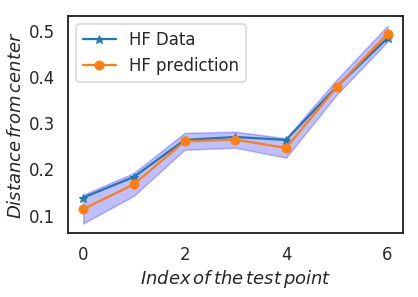

[ 0.99786746  0.99156038  0.99728482  0.99816057  0.99009319  0.99605666
  0.99927786  0.9864604   0.99579368  0.99829834  0.99819963  0.99813719
  0.9958163   0.99912414  0.99353284  0.99898422  0.99534245  0.99423943
  0.99838381  0.99349098  0.9990674   0.99830653  0.99792828  0.99867616
  0.99862288  0.99731633  0.9885965   0.99813889  0.99586949  0.99821125
  0.99816515  0.99748702  0.99677269  0.99409062  0.9904163   0.95576764
  0.99507449  0.95421655  0.99484388  0.99741341  0.97311354  0.98989075
  0.99713233  0.96860882  0.9961443   0.99583427  0.9954149   0.99280233
  0.99691032  0.99941618  0.99733363  0.99704425  0.99804388  0.99642655
  0.92411707  0.99489493  0.99862461  0.99376172  0.99870866  0.99747092
  0.99729083  0.99591033  0.99913928  0.96601692  0.99650154  0.99482102
  0.99167076  0.9980691   0.99530629  0.99801356  0.99573375  0.99788629
  0.9912429   0.99729875  0.99628732  0.9984046   0.9986934   0.98757867
  0.99397877  0.99422904  0.99770716  0.9935601   0

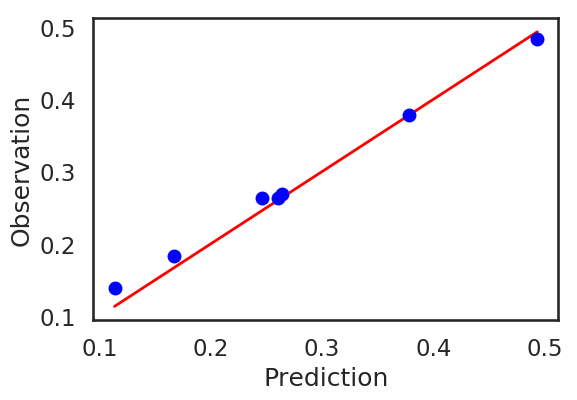

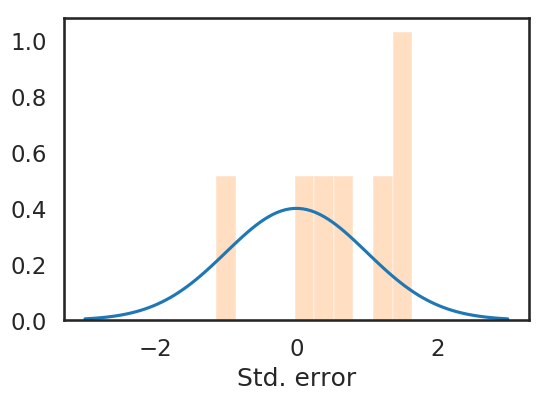

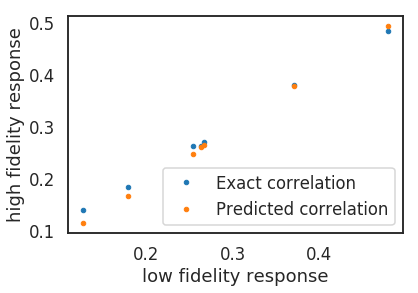

In [ ]:
  fig, ax = plt.subplots()
  #markers = ['o', 'x']
  #colors = ['red', 'blue']
  #for y, yp, vp, c, mk in zip(Y, Yp, Vp, colors, markers):
  ax.plot(np.arange(Xh_test.shape[0]), Yh_test, marker='*')
  ax.plot(np.arange(Xh_test.shape[0]), pred_high, marker='o')
  sp = np.sqrt(var.flatten())
  print pred_high
  #print Xh_train
  print Xh_test
  print Yh_test
  print var.flatten()
  #print sp
  lp = pred_high.flatten() - 2.0 * sp
  up = pred_high.flatten() + 2.0 * sp
  ax.fill_between(np.arange(Xh_test.shape[0]), lp.flatten(), up.flatten(), color='blue',
                      alpha=0.25)
  #ax.plot( f_h(Xp), 'k--')
  ax.set_xlabel('$Index\, of\, the\, test\, point$')
  ax.set_ylabel('$Distance\, from\, center$')
  #ax.set_title('Predict fast - function')
  plt.legend(['HF Data', 'HF prediction'], loc='best')
  plt.savefig('prediction_and_observations.png', bbox_inches = 'tight', pad_inches = 0)

  plt.show()


  fig, ax = plt.subplots(dpi=100)
  y_range = np.linspace(np.min(pred_high), np.max(pred_high), 50)
  ax.plot(y_range, y_range, 'r', lw=2)
  #for i in range(0, len(predictions)):
  ax.plot(pred_high, Yh_test, 'bo')
    #ax.plot(predictions[i], Yh_test, 'bo')
  ax.set_xlabel('Prediction')
  ax.set_ylabel('Observation');
  plt.savefig('prediction_vs_observations.png', bbox_inches = 'tight', pad_inches = 0)


  print R2_vector
  print MSE_vector
  print 'mean of R2 for bootstraps=', np.mean(R2_vector)
  print 'mean of MSE for bootstraps=', np.mean(MSE_vector)


  s_v = np.sqrt(var.flatten())
  e = (Yh_test.flatten() - pred_high.flatten()) / s_v
  #print s_v
  #print Vp[1].flatten()
  fig, ax = plt.subplots(dpi=100)
  zs = np.linspace(-3.0, 3.0, 100)
  ax.plot(zs, st.norm.pdf(zs))
  ax.hist(e, density=True, alpha=0.25)
  ax.set_xlabel('Std. error')
  plt.savefig('std_error.png', bbox_inches = 'tight', pad_inches = 0)

  
  fig = plt.figure(6)
  plt.plot(mu1, Yh_test, '.', label = "Exact correlation")
  plt.plot(mu1, mean, '.', label = "Predicted correlation")
  plt.xlabel('low fidelity response')
  plt.ylabel('high fidelity response')
  plt.legend()
  plt.savefig('correlations.png', bbox_inches = 'tight', pad_inches = 0)
  

In [ ]:
print R2_weird

[-0.6254217096494556]


In [ ]:
print weird_predictions

[array([[0.44225281],
       [0.43859588],
       [0.26889533],
       [0.31522586],
       [0.37271037],
       [0.41556868],
       [0.48477235]])]


In [ ]:
np.random.seed(11)
for i in range(0, 15):
  train_indices = np.random.choice((Xh.shape[0]), 15, replace=False)
  test_indices =  np.setdiff1d(np.arange(Xh.shape[0]), train_indices)
  print test_indices

[ 1  7 12 13 16 17]
[ 0  3  6 11 13 17]
[ 0  1  3  5  7 18]
[10 11 15 16 17 18]
[ 0  6  8 13 18 19]
[ 4 10 15 17 19 20]
[ 4  5  8 15 17 18]
[ 1  2 12 17 18 20]
[ 7  9 11 13 18 19]
[ 1  6 14 17 18 19]
[ 0  1  2  7 16 19]
[ 1  4  7 11 13 14]
[ 1  4  8 11 13 14]
[ 1  3  5 14 15 20]
[ 4  8  9 10 11 14]


In [ ]:
def checkDuplicatesWithinK(arr, n, k): 
  
    # Creates an empty list 
    myset = [] 
  
    # Traverse the input array 
    for i in range(n): 
      
        # If already present n hash, then we  
        # found a duplicate within k distance 
        if arr[i] in myset: 
            return True
  
        # Add this item to hashset 
        myset.append(arr[i]) 
  
        # Remove the k+1 distant item 
        if (i >= k): 
            myset.remove(arr[i - k]) 
    return False
  
# Driver Code 
if __name__ == "__main__": 
      
    arr = MSE_vector
    n = len(arr) 
    if (checkDuplicatesWithinK(arr, n, 3)): 
        print("Yes") 
    else: 
        print("No") 

No
